In [586]:
# data manipulation
import numpy as np 
import pandas as pd 

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# train-test data set 
from sklearn.model_selection import train_test_split

# Ml Model
from sklearn.linear_model import LinearRegression

# evalution metrics
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm


In [587]:
df = pd.read_csv('insurance.csv')

In [588]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# (1) Data cleaning and processing

- Before the model can be created we need to clean up the data and understand what its telling us.

- What we know from the task brief:

    - Plot a scatter plot with age on the x-axis and charges on the y-axis.

    - Using linear_model.LinearRegression() from sklearn, fit a model to
your data, and make predictions on data.

    - Plot another scatter plot with the best-fit line

Data and preprocessing steps must come first


In [589]:
df.shape

(1338, 7)

In [590]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [591]:
# Remove rows with missing values
df = df.dropna()

### What we know so far...

- There are a mix of different data types

- There are seven columns excluding the index, w/ 1338 entries.

- There are no null value entries, esspecially after using df.dropna()

### What we don't know...

- Are there any duplicate entries

- Which other columns outside the scope are appropriote for data analysis

In [592]:
# printing and then dropping any duplicate values
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

1


### Additional Column Analysis

- As we are primarily observing the 'age' and 'charges' column, the need for additional columns is not appropriate and may mess with our model but...

- We can use any of them in our visualisations such as utilisingh a 'hue'.

### Target Identification

- This is easy as we know from the brief what we need : 'age' & 'charges'.

In [593]:
# Extracting features and target variable
X = df[['age']]
y = df['charges']

# (2) Scatter plot via Matplotlib/seaborn

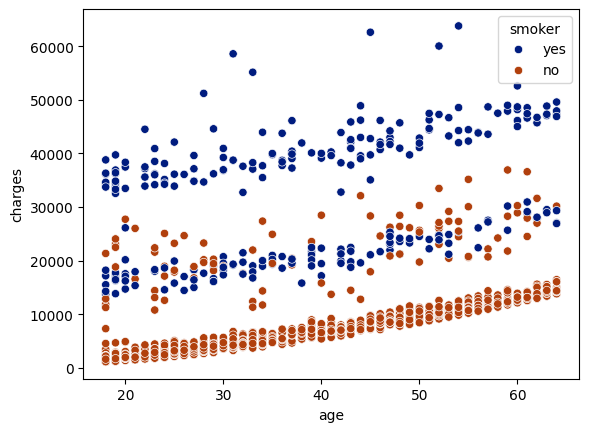

In [594]:
# Define the bin ranges for BMI
bin_ranges = [14, 19, 26, 35, 45, 55]
bin_labels = ['14-18.9', '19-25.9', '26-34.9', '35-44.9', '45-55']

# Bin the BMI values
df['bmi_range'] = pd.cut(df['bmi'], bins=bin_ranges, labels=bin_labels)

# scatter plot
fig, (ax1) = plt.subplots()
ax1.grid(False)

sns.scatterplot(data=df,
                x='age',
                y='charges',
                ax=ax1,
                palette='dark',
                hue='smoker',
                #hue='bmi_range',
                #hue='children',
                #hue='region',
                #hue='sex',
# commented out hue's to tests if any on the other varibles (columns) hold gravity before constructing the model
)

plt.show()

## What Does This mean?

- We can see thanks to the hue, general trends among smokers and non-smokers.

- There is a slow steadily increasing trend for each group.

- Lower charges for non-smokers and higher charges for smokers.

## What else does this plot tell us?

- That there could be more variables involved other than 'age' & 'smoker', exhibited by the region varying from £20k-30k (assuming pounds sterling).

- Whilst even here, smokers show they are plotted with greater charges applied but varibales such as sex, region, bmi and children do apply.

- Upon further analysis working through multiple hue variants of the columns, no proper correlation can be found from this dataset, bmi, sex, region and children when used show massive variation. BMI being the more applicable but still containing too much variation to make asumptions from.

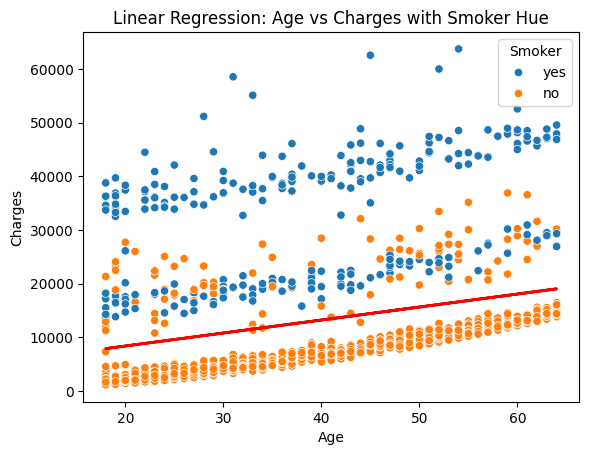

In [595]:
# Extract the features (X) and target variable (y)
X = df[['age']]  # Independent variable
y = df['charges']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Plot with seaborn with hue as 'smoker'
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.plot(X_test, predictions, color='red', linewidth=2) #add tredline from ML model
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Linear Regression: Age vs Charges with Smoker Hue')
plt.legend(title='Smoker', loc='upper right')
plt.show()

In [596]:
# Make predictions
predictions = model.predict(X)

# Calculate MSE
mse = mean_squared_error(y, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 133613156.02862704


In [598]:
r2 = r2_score(y, predictions)
print("R^2 Score:", r2)

R^2 Score: 0.08828292330610576


## What does this mean?

The Mean Squared Error (MSE) is a measure of the quality of the predictions made by a model. 

- The MSE is 133613156.02862704, which indicates that the model's predictions are not very accurate.

The R^2 Score, on the other hand ranges from 0 to 1, where 1 indicates a perfect model. 

- The R^2 Score is 0.08828292330610576, which is low, indicating that the model's predictions are not very accurate.

# (3) Ordinary Least Squares ML Model

- OLS is a statistical method used to estimate the parameters of a linear regression model. 

- It is based on the idea of minimising the sum of the squared differences between the observed values and the predicted values.

In [ ]:
# Add constant to the independent variable matrix
X = sm.add_constant(X)

In [ ]:
# Fit OLS model
model = sm.OLS(y, X).fit()

In [ ]:
# Print model summary
print(model.summary())

# Predictions with a 25-40 age range to test
X_new = sm.add_constant(pd.Series([25, 30, 35, 40]))
predictions = model.predict(X_new)

# Print predictions for age range
print('Predictions:', predictions)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     130.4
Date:                Fri, 16 Feb 2024   Prob (F-statistic):           6.98e-29
Time:                        17:48:01   Log-Likelihood:                -14405.
No. Observations:                1337   AIC:                         2.881e+04
Df Residuals:                    1335   BIC:                         2.882e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3190.0217    938.396      3.399      0.0

# (4) Evaluation Metrics

In [ ]:
# Make predictions
predictions = model.predict(X)

# Calculate MSE
mse = mean_squared_error(y, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 133509857.07843922


- The MSE value for the OLS model is similar to the LinearRegression() model used previously. 

- Each model requires further optimisation , which can be done using a grid search or randomised search method. 

# (5) Improvement and Optimisation

## OLS RRegression Results:

The output includes the following statistics: 

- The R-squared is 0.89, indicating that the explains 8.9 of the variance incharges'. 

- The intercept term is 3190.0217 and the coefficient of 'age' is 257.2297, indicating that for each additional year of age, the predicted 'charges' increases by £257.23. 

## Linear Regression model, MSE

- In this case, the MSE value is 133613156.02862704. 

- This value is relatively high, indicating that the model's predictions are not very accurate. 

- It suggests that there is still a significant amount of unexplained variance in the dependent variable, and that the model could be improved.

## To optimize this model, there are a few things that can be done:

- I could check for and correct any issues with the data, such as outliers or missing values.

- I can trasnform the dependent variable or independent variable to reduce non-normality of the output.

- I could use a different regression model, such as a robust regression or a generalised linear model.